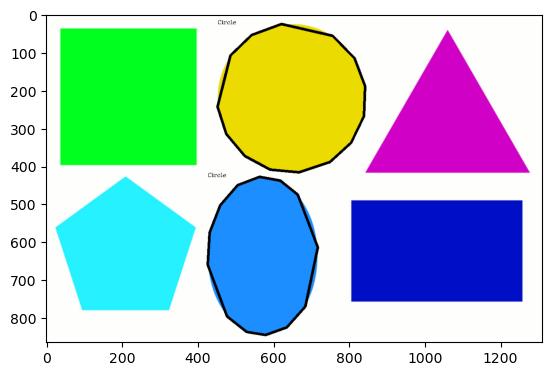

In [5]:


import numpy as np
import cv2
import matplotlib.pyplot as plt

img = cv2.imread('shapes.png')
imgGray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

ret, thresh = cv2.threshold(imgGray, 240, 255, cv2.THRESH_BINARY)
contours, hierarchy = cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_NONE)

for contour in contours:
    approx = cv2.approxPolyDP(contour, 0.01 * cv2.arcLength(contour, True), True)
    area = cv2.contourArea(contour)
    x, y, w, h = cv2.boundingRect(approx)
    
    if len(approx) > 8 and area > 1000:  # Adjust the conditions based on your specific case
        cv2.drawContours(img, [approx], 0, (0, 0, 0), 5)
        cv2.putText(img, "Circle", (x, y), cv2.FONT_HERSHEY_COMPLEX, 0.5, (0, 0, 0))

plt.imshow(img)
plt.show()

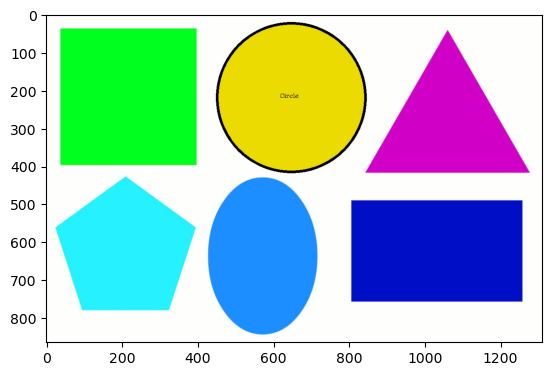

In [6]:

import numpy as np
import cv2

img = cv2.imread('shapes.png')
imgGray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Edge detection using Canny
edges = cv2.Canny(imgGray, 50, 150)

# Circle detection using HoughCircles
circles = cv2.HoughCircles(edges, cv2.HOUGH_GRADIENT, dp=1, minDist=20,
                           param1=50, param2=29, minRadius=20, maxRadius=200)

if circles is not None:
    circles = np.uint16(np.around(circles))
    
    for i in circles[0, :]:
        center = (i[0], i[1])
        cv2.circle(img, center, i[2], (0, 0, 0), 5)
        cv2.putText(img, "Circle", (i[0]-30, i[1]), cv2.FONT_HERSHEY_COMPLEX, 0.5, (0, 0, 0))


plt.imshow(img)
plt.show()

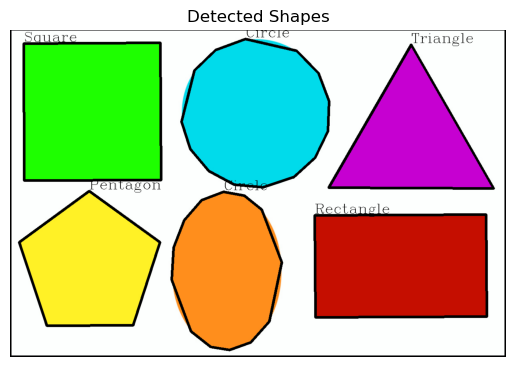

In [7]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

# Load the image
img = cv2.imread('shapes.png')

# Convert the image to grayscale
imgGrey = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Apply binary thresholding
_, thrash = cv2.threshold(imgGrey, 240, 255, cv2.THRESH_BINARY)

# Find contours in the image
contours, _ = cv2.findContours(thrash, cv2.RETR_TREE, cv2.CHAIN_APPROX_NONE)

# Loop through the contours to detect and label shapes
for contour in contours:
    approx = cv2.approxPolyDP(contour, 0.01 * cv2.arcLength(contour, True), True)
    cv2.drawContours(img, [approx], 0, (0, 0, 0), 5)  # Draw the contours
    x = approx.ravel()[0]
    y = approx.ravel()[1] - 5

    if len(approx) == 3:
        cv2.putText(img, "Triangle", (x, y), cv2.FONT_HERSHEY_COMPLEX, 1.2, (0, 0, 0))
    elif len(approx) == 4:
        x1, y1, w, h = cv2.boundingRect(approx)
        aspectRatio = float(w) / h
        if 0.95 <= aspectRatio <= 1.05:
            cv2.putText(img, "Square", (x, y), cv2.FONT_HERSHEY_COMPLEX, 1.2, (0, 0, 0))
        else:
            cv2.putText(img, "Rectangle", (x, y), cv2.FONT_HERSHEY_COMPLEX, 1.2, (0, 0, 0))
    elif len(approx) == 5:
        cv2.putText(img, "Pentagon", (x, y), cv2.FONT_HERSHEY_COMPLEX, 1.2, (0, 0, 0))
    elif len(approx) == 10:
        cv2.putText(img, "Star", (x, y), cv2.FONT_HERSHEY_COMPLEX, 1.2, (0, 0, 0))
    else:
        cv2.putText(img, "Circle", (x, y), cv2.FONT_HERSHEY_COMPLEX, 1.2, (0, 0, 0))

# Convert the final image with detected shapes from BGR to RGB
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# Display the image using matplotlib
plt.imshow(img_rgb)
plt.title('Detected Shapes')
plt.axis('off')  # Hide the axis
plt.show()


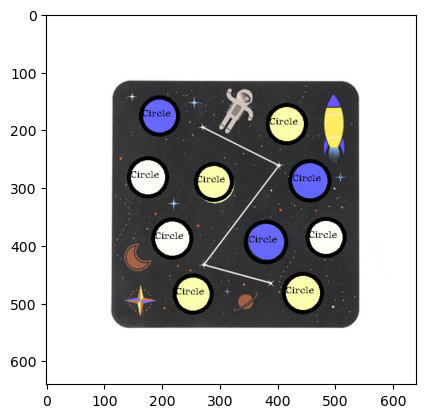

In [8]:
import numpy as np
import cv2

img = cv2.imread('mp.jpg')
imgGray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Edge detection using Canny
edges = cv2.Canny(imgGray, 50, 150)

# Circle detection using HoughCircles
circles = cv2.HoughCircles(edges, cv2.HOUGH_GRADIENT, dp=1, minDist=20,
                           param1=50, param2=29, minRadius=20, maxRadius=50)

if circles is not None:
    circles = np.uint16(np.around(circles))
    
    for i in circles[0, :]:
        center = (i[0], i[1])
        cv2.circle(img, center, i[2], (0, 0, 0), 5)
        cv2.putText(img, "Circle", (i[0]-30, i[1]), cv2.FONT_HERSHEY_COMPLEX, 0.5, (0, 0, 0))


plt.imshow(img)
plt.show()